# PERCEPTRON EXERCISE -13

In [1]:
# for loading csv files
import pandas as pd
# for plotting and visualising
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib nbagg
import numpy as np
import random

In [2]:
# loading csv files into a dataframe variable
data_file_1 = pd.read_csv('datafile1.csv', names=['x1','x2','y'])
data_file_2 = pd.read_csv('datafile2.csv', names=['x1','x2','y'])
data_file_3 = pd.read_csv('datafile3.csv', names=['x1','x2','y'])
data_file_4 = pd.read_csv('datafile4.csv', names=['x1','x2','y'])

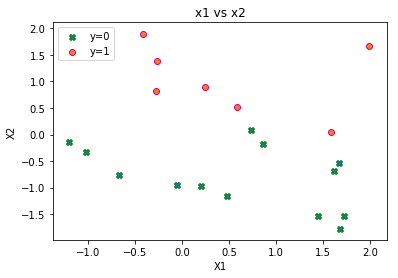

In [3]:
fig = plt.figure
plt.scatter(x = data_file_1[data_file_1['y']==0].x1, y = data_file_1[data_file_1['y']==0].x2, edgecolors='g', marker = 'X', label='y=0')
plt.scatter(x = data_file_1[data_file_1['y']==1].x1, y = data_file_1[data_file_1['y']==1].x2, edgecolors='m', marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('x1 vs x2')
plt.legend()
 
plt.show()

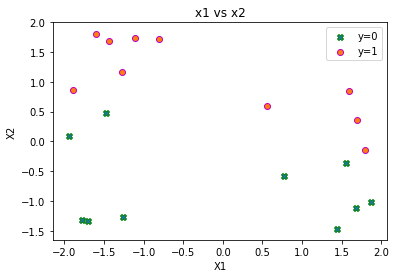

In [4]:
plt.scatter(x = data_file_2[data_file_2['y']==0].x1, y = data_file_2[data_file_2['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_2[data_file_2['y']==1].x1, y = data_file_2[data_file_2['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
 
plt.title('x1 vs x2')
plt.show()

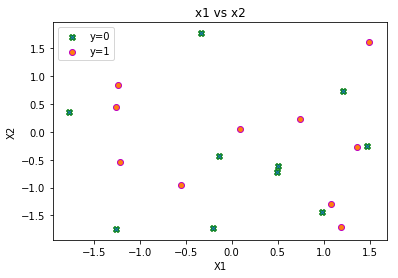

In [5]:
plt.scatter(x = data_file_3[data_file_3['y']==0].x1, y = data_file_3[data_file_3['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_3[data_file_3['y']==1].x1, y = data_file_3[data_file_3['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.xlabel('X1')
plt.title('x1 vs x2')
plt.ylabel('X2')
 
plt.legend()
plt.show()

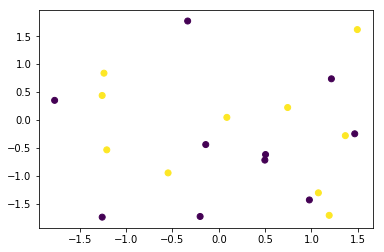

In [6]:
plt.scatter(x=data_file_3['x1'], y=data_file_3['x2'], c=data_file_3['y'])
plt.show()
 

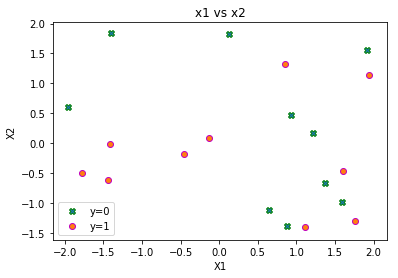

In [7]:
plt.scatter(x = data_file_4[data_file_4['y']==0].x1, y = data_file_4[data_file_4['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_4[data_file_4['y']==1].x1, y = data_file_4[data_file_4['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.title('x1 vs x2')
plt.xlabel('X1')
plt.ylabel('X2')
 
plt.legend()
plt.show()

In [8]:
# converting the datframe to a list of rows 
data_file_1_row = []
for row in data_file_1.iterrows():
    index, data = row
    data_file_1_row.append(data.tolist())
    
data_file_2_row = []
for row in data_file_2.iterrows():
    index, data = row
    data_file_2_row.append(data.tolist())
    
data_file_3_row = []
for row in data_file_3.iterrows():
    index, data = row
    data_file_3_row.append(data.tolist())

data_file_4_row = []
for row in data_file_4.iterrows():
    index, data = row
    data_file_4_row.append(data.tolist())


In [28]:
len(data_file_1_row)

20

In [9]:
# Make a prediction with weights
def predict(row, weights):
    # weights = [ w1, w2, bias]
    activation = weights[2]
    for i in range(len(row)-1):
        activation += weights[i] * row[i]
    return 1.0 if activation > 0.0 else 0.0

In [10]:
# selecting random weights
# weights = [1, -0.16546195, -0.1]
weights = np.random.random_sample([3])

In [11]:
for row in data_file_1_row:
    prediction = predict(row, weights)
    print("Expected=",row[-1], "\tPredicted=",prediction)

Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 0.0 	Predicted= 1.0
Expected= 1.0 	Predicted= 1.0


In [31]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train_row, learning_rate, epoch_count):
    # selecting random initial weights
    weights = np.random.random_sample([3])
    weight = []
#     print(weights)
#     x_matrix = [train_row[0],train_row[1],1]
    for epoch in range(epoch_count):
        #initialising total error to be 0 for every epoch
        total_error = 0.0
        for row in train_row:
            prediction = predict(row, weights)
            # row[-1] consists of expected y values
            error = row[-1] - prediction
            total_error += error
            
            # updating bias, bias = bias + lr * error
            weights[2] = weights[2] + learning_rate * error
            
            # updating weights
            for i in range(len(row)-1):
                weights[i] = weights[i] + learning_rate * error * row[i]
        print('epoch=',epoch, '\tlrate=',learning_rate,'\terror=',total_error)
        var_weight = [weights[0],weights[1],weights[2]]
        weight.append(var_weight)
#         print(weight)
#         if (total_error == 0):
#             count += 1
#         else: 
#             count = 0
#         if (count == 5):
#             break
        
    return weight

In [32]:
learning_rate = 0.1
epoch_count = 30

In [37]:
train_weights(data_file_1_row, learning_rate, epoch_count)

epoch= 0 	lrate= 0.1 	error= -7.0
epoch= 1 	lrate= 0.1 	error= -2.0
epoch= 2 	lrate= 0.1 	error= 0.0
epoch= 3 	lrate= 0.1 	error= 0.0
epoch= 4 	lrate= 0.1 	error= 0.0
epoch= 5 	lrate= 0.1 	error= 0.0
epoch= 6 	lrate= 0.1 	error= 0.0
epoch= 7 	lrate= 0.1 	error= 0.0
epoch= 8 	lrate= 0.1 	error= 0.0
epoch= 9 	lrate= 0.1 	error= 0.0
epoch= 10 	lrate= 0.1 	error= 0.0
epoch= 11 	lrate= 0.1 	error= 0.0
epoch= 12 	lrate= 0.1 	error= 0.0
epoch= 13 	lrate= 0.1 	error= 0.0
epoch= 14 	lrate= 0.1 	error= 0.0
epoch= 15 	lrate= 0.1 	error= 0.0
epoch= 16 	lrate= 0.1 	error= 0.0
epoch= 17 	lrate= 0.1 	error= 0.0
epoch= 18 	lrate= 0.1 	error= 0.0
epoch= 19 	lrate= 0.1 	error= 0.0
epoch= 20 	lrate= 0.1 	error= 0.0
epoch= 21 	lrate= 0.1 	error= 0.0
epoch= 22 	lrate= 0.1 	error= 0.0
epoch= 23 	lrate= 0.1 	error= 0.0
epoch= 24 	lrate= 0.1 	error= 0.0
epoch= 25 	lrate= 0.1 	error= 0.0
epoch= 26 	lrate= 0.1 	error= 0.0
epoch= 27 	lrate= 0.1 	error= 0.0
epoch= 28 	lrate= 0.1 	error= 0.0
epoch= 29 	lrate= 0.1 

[[0.085930048176759366, 0.68414249688802187, 0.051088527956737628],
 [-0.073514267645384587, 0.69238395401643615, -0.14891147204326238],
 [0.012077036706882954, 0.68876857063272923, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204326238],
 [0.097668341059150496, 0.6851531872490223, -0.14891147204

In [15]:
weights_2 = train_weights(data_file_2_row, learning_rate, epoch_count)

epoch= 0 	lrate= 0.1 	error= -3.0
epoch= 1 	lrate= 0.1 	error= -2.0
epoch= 2 	lrate= 0.1 	error= 0.0
epoch= 3 	lrate= 0.1 	error= 0.0
epoch= 4 	lrate= 0.1 	error= 0.0
epoch= 5 	lrate= 0.1 	error= 0.0
epoch= 6 	lrate= 0.1 	error= 0.0
epoch= 7 	lrate= 0.1 	error= 0.0
epoch= 8 	lrate= 0.1 	error= 0.0
epoch= 9 	lrate= 0.1 	error= 0.0
epoch= 10 	lrate= 0.1 	error= 0.0
epoch= 11 	lrate= 0.1 	error= 0.0
epoch= 12 	lrate= 0.1 	error= 0.0
epoch= 13 	lrate= 0.1 	error= 0.0
epoch= 14 	lrate= 0.1 	error= 0.0
epoch= 15 	lrate= 0.1 	error= 0.0
epoch= 16 	lrate= 0.1 	error= 0.0
epoch= 17 	lrate= 0.1 	error= 0.0
epoch= 18 	lrate= 0.1 	error= 0.0
epoch= 19 	lrate= 0.1 	error= 0.0


In [16]:
weights_3 = train_weights(data_file_3_row, learning_rate, epoch_count)

epoch= 0 	lrate= 0.1 	error= -9.0
epoch= 1 	lrate= 0.1 	error= -2.0
epoch= 2 	lrate= 0.1 	error= 1.0
epoch= 3 	lrate= 0.1 	error= -1.0
epoch= 4 	lrate= 0.1 	error= 1.0
epoch= 5 	lrate= 0.1 	error= -1.0
epoch= 6 	lrate= 0.1 	error= 1.0
epoch= 7 	lrate= 0.1 	error= 0.0
epoch= 8 	lrate= 0.1 	error= -1.0
epoch= 9 	lrate= 0.1 	error= 1.0
epoch= 10 	lrate= 0.1 	error= -1.0
epoch= 11 	lrate= 0.1 	error= 1.0
epoch= 12 	lrate= 0.1 	error= -1.0
epoch= 13 	lrate= 0.1 	error= 1.0
epoch= 14 	lrate= 0.1 	error= 0.0
epoch= 15 	lrate= 0.1 	error= -1.0
epoch= 16 	lrate= 0.1 	error= 0.0
epoch= 17 	lrate= 0.1 	error= 1.0
epoch= 18 	lrate= 0.1 	error= 0.0
epoch= 19 	lrate= 0.1 	error= -1.0


In [17]:
weights_4 = train_weights(data_file_4_row, learning_rate, epoch_count)

epoch= 0 	lrate= 0.1 	error= -10.0
epoch= 1 	lrate= 0.1 	error= 0.0
epoch= 2 	lrate= 0.1 	error= -1.0
epoch= 3 	lrate= 0.1 	error= 1.0
epoch= 4 	lrate= 0.1 	error= 0.0
epoch= 5 	lrate= 0.1 	error= 0.0
epoch= 6 	lrate= 0.1 	error= -1.0
epoch= 7 	lrate= 0.1 	error= 1.0
epoch= 8 	lrate= 0.1 	error= 0.0
epoch= 9 	lrate= 0.1 	error= 0.0
epoch= 10 	lrate= 0.1 	error= -1.0
epoch= 11 	lrate= 0.1 	error= 1.0
epoch= 12 	lrate= 0.1 	error= 0.0
epoch= 13 	lrate= 0.1 	error= -1.0
epoch= 14 	lrate= 0.1 	error= 1.0
epoch= 15 	lrate= 0.1 	error= 0.0
epoch= 16 	lrate= 0.1 	error= 0.0
epoch= 17 	lrate= 0.1 	error= 0.0
epoch= 18 	lrate= 0.1 	error= 0.0
epoch= 19 	lrate= 0.1 	error= -1.0


In [18]:
def line_func(x, weights):
    y = -((weights[-1][0]/weights[-1][1])*x - (weights[-1][2]/weights[-1][1]))
    return y

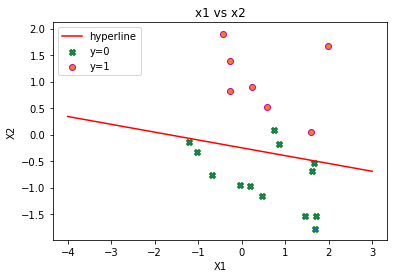

In [19]:
# for plotting the graph of line
x = np.arange(-4,4)
y = line_func(x, weights_1)
plt.plot(x,y, color = 'r', label='hyperline')
plt.scatter(x = data_file_1[data_file_1['y']==0].x1, y = data_file_1[data_file_1['y']==0].x2, edgecolors='g', marker = 'X', label='y=0')
plt.scatter(x = data_file_1[data_file_1['y']==1].x1, y = data_file_1[data_file_1['y']==1].x2, edgecolors='m', marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
 
plt.title('x1 vs x2')
plt.show()


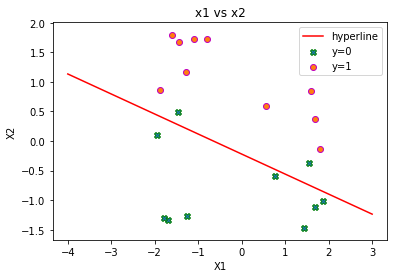

In [20]:
# for plotting the graph of line
x = np.arange(-4,4)
y = line_func(x, weights_2)
plt.plot(x,y, color = 'r', label='hyperline')
plt.scatter(x = data_file_2[data_file_2['y']==0].x1, y = data_file_2[data_file_2['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_2[data_file_2['y']==1].x1, y = data_file_2[data_file_2['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
 
plt.title('x1 vs x2')
plt.legend()
plt.show()

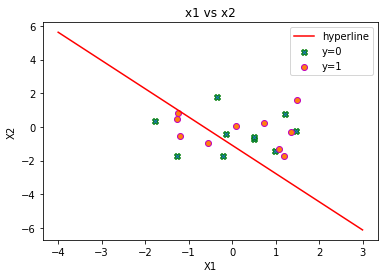

In [21]:
# for plotting the graph of line

x = np.arange(-4,4)
y = line_func(x, weights_3)
plt.plot(x,y, color = 'r', label='hyperline')
plt.scatter(x = data_file_3[data_file_3['y']==0].x1, y = data_file_3[data_file_3['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_3[data_file_3['y']==1].x1, y = data_file_3[data_file_3['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
 
plt.legend()
plt.title('x1 vs x2')
plt.show()

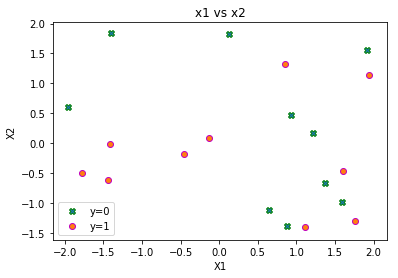

In [22]:
# for plotting the graph of line
x = np.arange(-4,4)
y = line_func(x, weights_4)

plt.scatter(x = data_file_4[data_file_4['y']==0].x1, y = data_file_4[data_file_4['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_4[data_file_4['y']==1].x1, y = data_file_4[data_file_4['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')
plt.xlabel('X1')
plt.ylabel('X2')
 
plt.legend()
plt.title('x1 vs x2')
plt.show()

## Animation Plots

### Data File 1

<IPython.core.display.Javascript object>


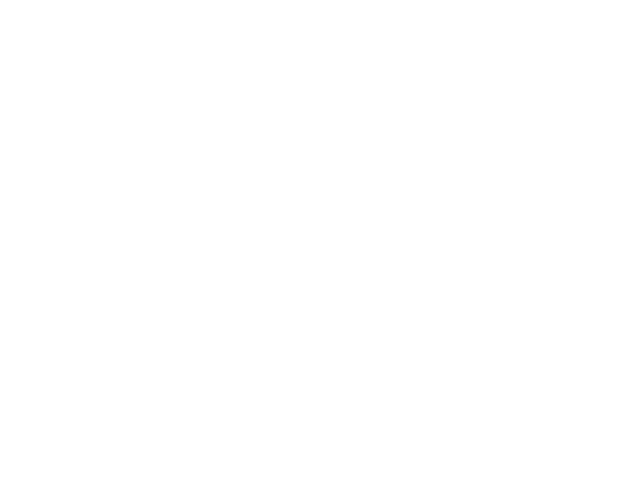

In [23]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib nbagg
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
x1 = data_file_1['x1']
x2 = data_file_1['x2']
y = data_file_1['y']
w = weights_1
plt.scatter(x = data_file_1[data_file_1['y']==0].x1, y = data_file_1[data_file_1['y']==0].x2, edgecolors='g', marker = 'X', label='y=0')
plt.scatter(x = data_file_1[data_file_1['y']==1].x1, y = data_file_1[data_file_1['y']==1].x2, edgecolors='m', marker = 'o', label='y=1')


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x1
    y = -((w[i][0]/w[i][1])*x - (w[i][2]/w[i][1]))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_2), interval=200, blit=True, repeat = False)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['hyperline','y=0','y=1'])
plt.title('x1 vs x2')
plt.show()

### Data File 2

<IPython.core.display.Javascript object>


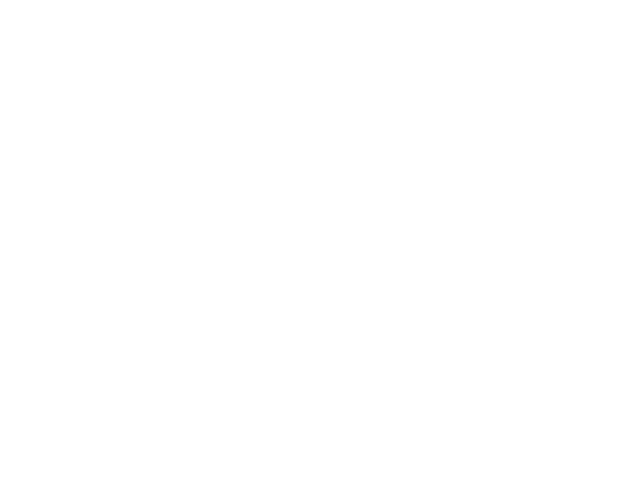

In [24]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib nbagg
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
x1 = data_file_2['x1']
x2 = data_file_2['x2']
y = data_file_2['y']
w = weights_2
plt.scatter(x = data_file_2[data_file_2['y']==0].x1, y = data_file_2[data_file_2['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_2[data_file_2['y']==1].x1, y = data_file_2[data_file_2['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x1
    y = -((w[i][0]/w[i][1])*x - (w[i][2]/w[i][1]))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_2), interval=200, blit=True, repeat=False)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['hyperline','y=0','y=1'])
plt.title('x1 vs x2')
plt.show()

### Data File 3

<IPython.core.display.Javascript object>


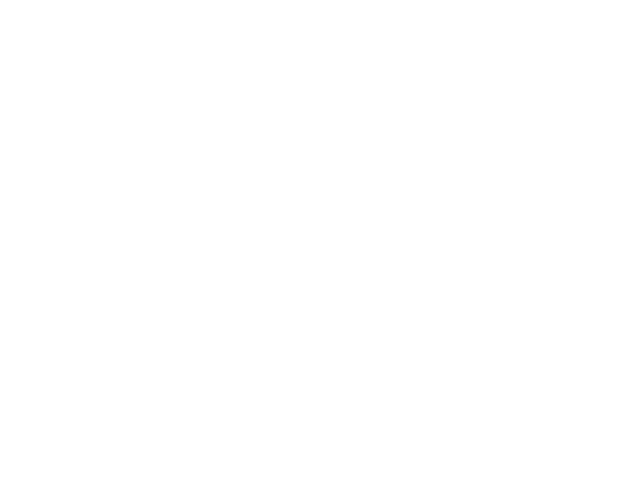

In [25]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib nbagg
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
x1 = data_file_3['x1']
x2 = data_file_3['x2']
y = data_file_3['y']
w = weights_3
plt.scatter(x = data_file_3[data_file_3['y']==0].x1, y = data_file_3[data_file_3['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_3[data_file_3['y']==1].x1, y = data_file_3[data_file_3['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x1
    y = -((w[i][0]/w[i][1])*x - (w[i][2]/w[i][1]))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_2), interval=200, blit=True, repeat=False)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['hyperline','y=0','y=1'])
plt.title('x1 vs x2')
plt.show()

### Data File 4

<IPython.core.display.Javascript object>


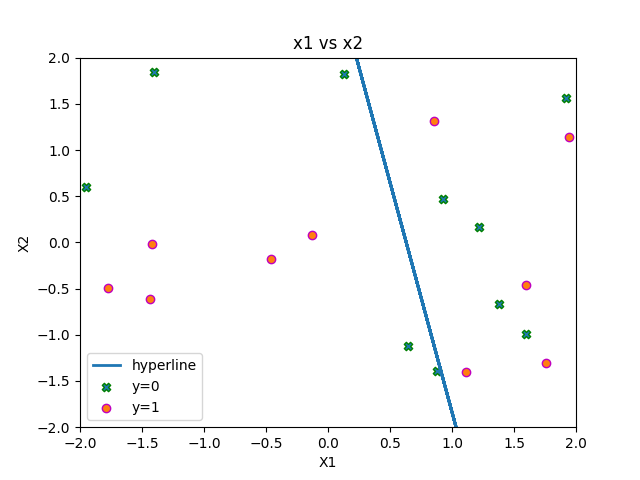

In [26]:
# First set up the figure, the axis, and the plot element we want to animate
%matplotlib nbagg
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
x1 = data_file_4['x1']
x2 = data_file_4['x2']
y = data_file_4['y']
w = weights_4
plt.scatter(x = data_file_4[data_file_4['y']==0].x1, y = data_file_4[data_file_4['y']==0].x2, edgecolors='g',marker = 'X', label='y=0')
plt.scatter(x = data_file_4[data_file_4['y']==1].x1, y = data_file_4[data_file_4['y']==1].x2, edgecolors='m',marker = 'o', label='y=1')



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = x1
    y = -((w[i][0]/w[i][1])*x - (w[i][2]/w[i][1]))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights_2), interval=200, blit=True, repeat=False)


plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['hyperline','y=0','y=1'])
plt.title('x1 vs x2')
plt.show()